In [1]:
# Difference of different t1 estimations
import os
import sys
import numpy as np
import argparse
import time
        
import SimpleITK as sitk
from scipy.io import loadmat
from scipy.optimize import least_squares, curve_fit, leastsq, root
from scipy.special import huber
from numpy.fft import fftn, ifftn
from tqdm import trange, tqdm
from functools import partial
from multiprocessing import Pool, Lock, cpu_count, current_process
from multiprocessing.shared_memory import SharedMemory #V3.8+ only

import warnings
warnings.filterwarnings("ignore")
from itertools import combinations


In [2]:
# read teh different t1 estimations files
# read image using ants
import ants
def read_img_ants(path):
    img = ants.image_read(path)
    return img.numpy(), img.origin, img.spacing, img.direction

def write_img_ants(path, data, o, s, d):
    img = ants.from_numpy(data, spacing = s, origin = o, direction = d)
    img.to_file(path)

t1_0, o3, s3, d3 = read_img_ants('recons0/tm0.nrrd')
t1_1, o4, s4, d4 = read_img_ants('recons1/tm1.nrrd')
t1_2, o2, s2, d2 = read_img_ants('recons/tm.nrrd')





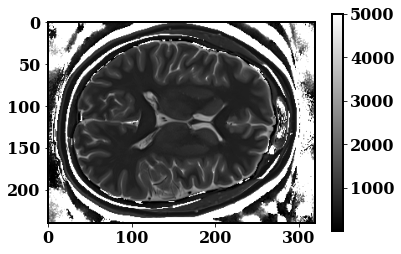

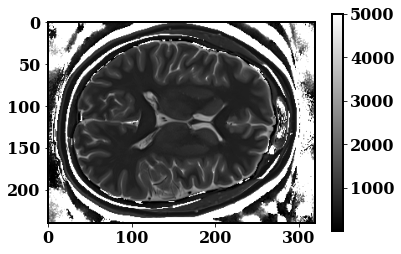

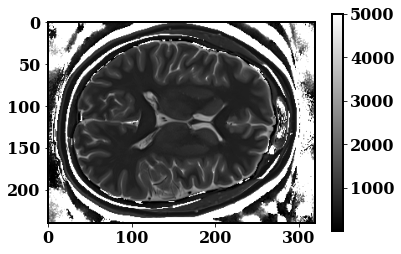

In [4]:
# Show these images in same figure
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import colors
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['font.weight'] = 'bold'
rcParams['mathtext.fontset'] = 'cm'
rcParams['mathtext.rm'] = 'serif'
rcParams['axes.linewidth'] = 2
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.labelsize'] = 16

plt.imshow(t1_2[:,:,30], cmap = 'gray')
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(t1_2[:,:,30], cmap = 'gray')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(t1_2[:,:,30], cmap = 'gray')
plt.colorbar()
plt.show()


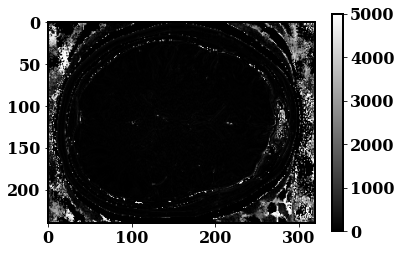

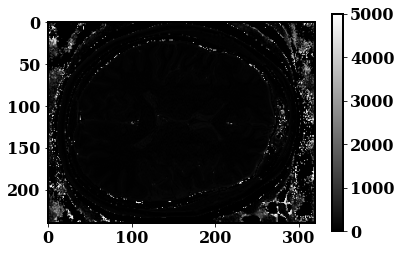

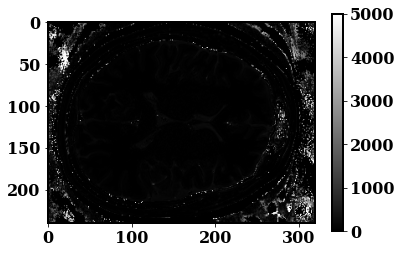

In [7]:
# show the difference images
plt.figure()
plt.imshow(np.abs(t1_0[:,:,30] - t1_1[:,:,30]), cmap = 'gray')
plt.colorbar()
plt.show()
plt.imshow(np.abs(t1_0[:,:,30] - t1_2[:,:,30]), cmap = 'gray')
plt.colorbar()
plt.show()
plt.imshow(np.abs(t1_1[:,:,30] - t1_2[:,:,30]), cmap = 'gray')
plt.colorbar()
plt.show()


In [10]:
input_image = ants.image_read('/fileserver/fastscratch/prabh/projects/qt1/psirt1map/kristina_data/qT1Analysis_ForDifferentPulseSeq/psir_CRL/common-processed/modules/Parcellation/NVM/ParcellationNVM_WM.nii.gz')
input_image2 = ants.image_read('/fileserver/fastscratch/prabh/projects/qt1/psirt1map/kristina_data/qT1Analysis_ForDifferentPulseSeq/psir_CRL/common-processed/modules/Parcellation/NVM/ParcellationNVM_GM.nii.gz')
target_image = ants.image_read('recons/tm.nrrd')
wm = ants.resample_image_to_target(input_image, target_image, interp_type=1)
gm = ants.resample_image_to_target(input_image2, target_image, interp_type=1)
wm = wm.numpy()
gm = gm.numpy()

# mean values of three t1 maps
print("Mean values of WM for three T1maps are:",np.mean(t1_0[wm!=0]), np.mean(t1_1[wm!=0]) , np.mean(t1_2[wm!=0]))
print("Mean values of GM for three T1maps are:",np.mean(t1_0[gm!=0]), np.mean(t1_1[gm!=0]) , np.mean(t1_2[gm!=0]))

Mean values of WM for three T1maps are: 686.7257 713.74896 726.24664
Mean values of GM for three T1maps are: 1044.2045 1062.2013 1107.6393
